In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
# import pyhsmm
# import pyhsmm.basic.distributions as distributions
import ast
from common_functions import balanceDataset

In [ ]:
"""
For the model fitting, we first instantiate a 
"""

In [4]:
from hsmmlearn.hsmm import GaussianHSMM

durations = np.array([
    [0.1, 0.0, 0.0, 0.9],
    [0.1, 0.0, 0.9, 0.0],
    [0.1, 0.9, 0.0, 0.0]
])
tmat = np.array([
    [0.0, 0.5, 0.5],
    [0.3, 0.0, 0.7],
    [0.6, 0.4, 0.0]
])

means = np.array([0.0, 5.0, 10.0])
scales = np.ones_like(means)

hsmm = GaussianHSMM(
    means, scales, durations, tmat,
)

In [7]:
observations, states = hsmm.sample(300)

In [8]:
print(states[:20])

[0 0 0 0 1 1 1 2 2 1 1 1 0 2 2 0 0 0 0 1]


In [9]:
print (observations[:20])

[  0.57801149   1.17867206   0.96414072  -0.23163564   5.21918916
   3.66383298   7.00388876  10.58246028   8.81305251   4.83419749
   3.73777671   4.83182471   0.23701267   9.68406345  11.18413201
   0.17470047   0.16674697   0.19776764   0.08234372   3.42727427]


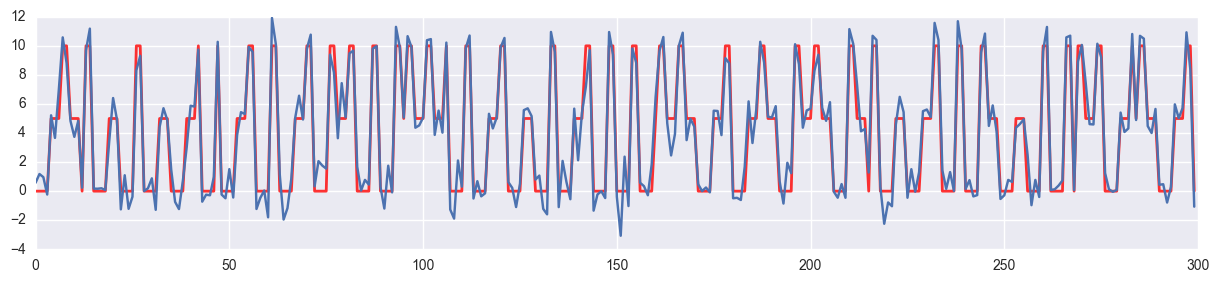

In [10]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[states], 'r', linewidth=2, alpha=.8)
ax.plot(observations)

In [11]:
decoded_states = hsmm.decode(observations)

In [13]:
np.sum(states != decoded_states)

0

In [14]:
means2 = np.array([0.0, 8.0, 10.0])
hsmm.durations = np.full((3, 4), 0.25)

In [16]:
hsmm.means = means2

In [22]:
observations, states = hsmm.sample(200)
decoded_states = hsmm.decode(observations)
np.sum(states != decoded_states)

18

In [24]:
from hsmmlearn.hsmm import HSMMModel
from hsmmlearn.emissions import GaussianEmissions

gaussian_hsmm = HSMMModel(
    GaussianEmissions(means, scales), durations, tmat)

In [21]:
# Convert json data to dictionary
with open('baseline_data.json') as f:
    data = f.read()
    data_dict_ = ast.literal_eval(data)

In [32]:
pd.DataFrame(data_dict_)

,age,alignment,behavior1,behavior2,behavior3,distraction1,distraction2,distraction3,gender,glance_sequence,...,lighting,locality,proximity_to_an_intersection,seatBelt,surfaceCondition,trafficControl,trafficDensity,trafficDivider,travelLanes,weather
0,2,0,1,0,0,5,5,0,0,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, ...",...,0,0,0,1,1,0,2,0,0,1
1,0,0,0,0,0,0,0,0,1,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,2,2,0,2,0,0,1,1,0,0
10,3,0,0,0,0,0,0,0,2,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,0,1,0,1,0,0,1,1,0,0
100,0,0,0,0,0,1,5,0,1,"[6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 4, ...",...,2,2,0,1,0,0,0,1,0,0
1000,1,0,0,0,0,4,0,0,0,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,0,0,0,1,0,0,0,1,1,0
1001,1,0,0,0,0,5,0,0,1,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,0,0,1,1,0,1,1,1,0,0
1002,2,0,1,0,0,1,0,0,0,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,0,2,0,1,1,0,1,1,1,1
1003,0,1,2,0,0,0,0,0,1,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,1,0,1,0,0,0,1,0,0,0
1004,3,0,0,0,0,5,1,0,2,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,2,1,0,1,0,0,0,1,0,0
1005,2,0,0,0,0,0,0,0,1,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",...,0,0,1,1,0,1,1,1,1,0


In [ ]:
balance

In [4]:
obs_dim = 2
Nmax = 25

#observation hyperparams
obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.3,
                'nu_0':obs_dim+5}
dur_hypparams = {'alpha_0':2*30,
                 'beta_0':2}

In [5]:
obs_distns = [distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
dur_distns = [distributions.PoissonDuration(**dur_hypparams) for state in range(Nmax)]

posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
        alpha=6.,gamma=6., # better to sample over these; see concentration-resampling.py
        init_state_concentration=6., # pretty inconsequential
        obs_distns=obs_distns,
        dur_distns=dur_distns)

In [33]:
posteriormodel.add_data(data, trunc = 60)


IndexError: tuple index out of range

In [25]:
pyhsmm.basic

<module 'pyhsmm.basic' from 'C:\ProgramData\Anaconda2\lib\site-packages\pyhsmm\basic\__init__.pyc'>